In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [50]:
df = pd.read_csv("./ridgetrain.txt", delim_whitespace=True, header=None)
df_test = pd.read_csv("./ridgetest.txt", delim_whitespace=True, header=None)

In [27]:
X = df[0]
y = df[1]
Xt = df_test[0]
yt = df_test[1]

In [7]:
def kernel(x:np.ndarray, y:np.ndarray):
    gamma = 0.1
    diff = x - y
    return np.exp(-gamma * np.dot(diff, diff))

In [16]:
n = len(df)
n

250

In [18]:
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i][j] = kernel(X[i], X[j])

In [21]:
def kernelized_vector(x:np.ndarray):
    Kvec = np.zeros((n))
    for i in range(n):
        Kvec[i] = kernel(X[i], x)
    return Kvec

In [24]:
y = y.to_numpy()

In [35]:
def model(x:np.ndarray, Lambda):
    mid_mat = np.linalg.inv(K + Lambda * np.eye(n))
    Kvec = kernelized_vector(x)
    return np.dot(y, mid_mat @ Kvec)

In [47]:
nt = len(df_test)
Lambda = 1
ypredt = np.zeros(nt)
for i in range(nt):
    ypredt[i] = model(Xt[i], Lambda)

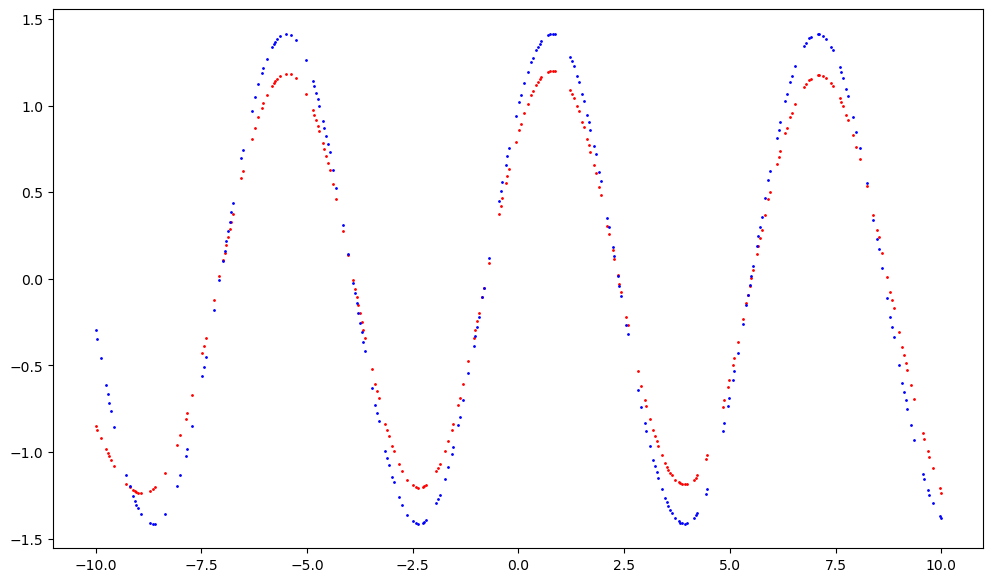

In [48]:
plt.figure(figsize=(12, 7))
plt.scatter(Xt, ypredt, c="red", s=1)
plt.scatter(Xt, yt, c="blue", s=1)

In [49]:
mse = mean_squared_error(yt, ypredt)
rmse = np.sqrt(mse)
rmse

0.17030390344202598

# Landmark Ridge